In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/Drive


In [19]:
%cd final

/content/Drive/MyDrive/HANYANG/2022 - 2/AI+X DeepLearning/final


In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [138]:
train = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [139]:
nCar = train.shape[0]
nVar = train.shape[1]
print('nCar: %d' % nCar, 'nVar: %d' % nVar )

nCar: 2000 nVar: 21


In [140]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [141]:
train_num = train[['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 
                 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']]
train_bool = train[['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']]

In [142]:
train_num.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15


In [143]:
train_bool.head()

,blue,dual_sim,four_g,three_g,touch_screen,wifi
0,0,0,0,0,0,1
1,1,1,1,1,1,0
2,1,1,1,1,1,0
3,1,0,0,1,0,0
4,1,0,1,1,1,0


In [144]:
origin_feature = train.drop('price_range', 1)
target = train['price_range']

x_train, x_test, y_train, y_test = train_test_split(origin_feature, target, test_size = 0.3)

<ipython-input-144-d72343a7e5ea>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  origin_feature = train.drop('price_range', 1)


In [145]:
params = {
    'max_depth': [8, 10, 12, 16],
    'n_estimators': [250, 500, 750, 1000],
    'min_samples_split': [8, 12]
}

rf_model = RandomForestClassifier(random_state = 13, n_jobs = -1)
grid_cv = GridSearchCV(rf_model, param_grid = params, cv = 2, n_jobs = -1)
grid_cv.fit(x_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=13),
             n_jobs=-1,
             param_grid={'max_depth': [8, 10, 12, 16],
                         'min_samples_split': [8, 12],
                         'n_estimators': [250, 500, 750, 1000]})

In [146]:
cv_results = pd.DataFrame(grid_cv.cv_results_)
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_split', 'param_n_estimators',
       'params', 'split0_test_score', 'split1_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [147]:
target_col = ['rank_test_score', 'mean_test_score', 'param_n_estimators', 'param_max_depth']
cv_results[target_col].sort_values('rank_test_score').head()

,rank_test_score,mean_test_score,param_n_estimators,param_max_depth
11,1,0.856429,1000,10
2,2,0.854286,750,8
19,2,0.854286,1000,12
9,2,0.854286,500,10
3,5,0.853571,1000,8


In [148]:
print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'max_depth': 10, 'min_samples_split': 8, 'n_estimators': 1000}
0.8564285714285714


In [149]:
best_data = grid_cv.best_estimator_
best_data.fit(x_train, y_train.values.reshape(-1, ))

pred1 = best_data.predict(x_test)

accuracy_score(y_test, pred1)

0.87

In [150]:
best_cols_values = best_data.feature_importances_
best_cols = pd.Series(best_cols_values, index = x_train.columns)
top8_cols = best_cols.sort_values(ascending=False)[:8]
top8_cols

ram              0.555619
battery_power    0.075832
px_width         0.053679
px_height        0.052308
mobile_wt        0.034910
int_memory       0.032589
talk_time        0.025553
sc_w             0.022609
dtype: float64

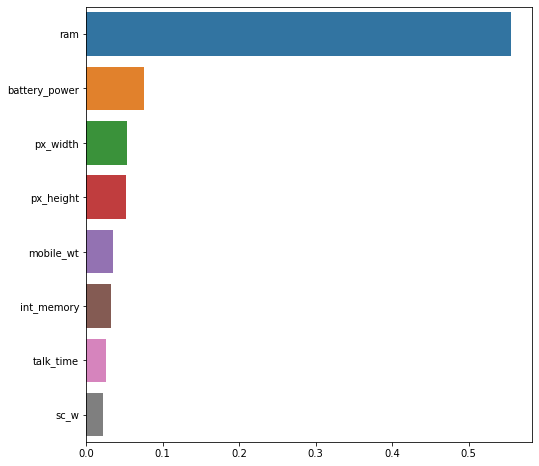

In [151]:
plt.figure(figsize = (8, 8))
sns.barplot(x = top8_cols, y = top8_cols.index)
plt.show()

In [152]:
x_train_re = x_train[top8_cols.index]
x_test_re = x_test[top8_cols.index]

rf_model_re = grid_cv.best_estimator_
rf_model_re.fit(x_train_re, y_train.values.reshape(-1, ))

pred1_re = rf_model_re.predict(x_test_re)

accuracy_score(y_test, pred1_re)

0.88

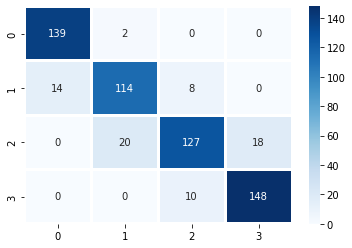

In [153]:
conf_matrix = pd.DataFrame(confusion_matrix(y_test, pred1_re))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', linewidths = 2, cmap = 'Blues')

In [154]:
top6_cols = best_cols.sort_values(ascending=False)[:6]
top6_cols
top4_cols = best_cols.sort_values(ascending=False)[:4]
top4_cols

ram              0.555619
battery_power    0.075832
px_width         0.053679
px_height        0.052308
dtype: float64

In [155]:
x_train_re = x_train[top6_cols.index]
x_test_re = x_test[top6_cols.index]

rf_model_re = grid_cv.best_estimator_
rf_model_re.fit(x_train_re, y_train.values.reshape(-1, ))

pred1_re = rf_model_re.predict(x_test_re)

accuracy_score(y_test, pred1_re)

0.8983333333333333

In [159]:
x_train_re = x_train[top4_cols.index]
x_test_re = x_test[top4_cols.index]

rf_model_re = grid_cv.best_estimator_
rf_model_re.fit(x_train_re, y_train.values.reshape(-1, ))

pred1_re = rf_model_re.predict(x_test_re)

accuracy_score(y_test, pred1_re)

0.905

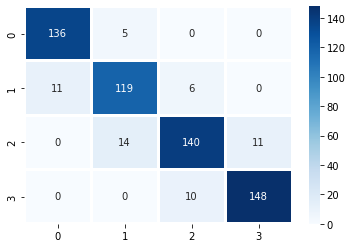

In [160]:
conf_matrix = pd.DataFrame(confusion_matrix(y_test, pred1_re))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', linewidths = 2, cmap = 'Blues')

In [161]:
top3_cols = best_cols.sort_values(ascending=False)[:3]
top3_cols

ram              0.555619
battery_power    0.075832
px_width         0.053679
dtype: float64

In [162]:
x_train_re = x_train[top3_cols.index]
x_test_re = x_test[top3_cols.index]

rf_model_re = grid_cv.best_estimator_
rf_model_re.fit(x_train_re, y_train.values.reshape(-1, ))

pred1_re = rf_model_re.predict(x_test_re)

accuracy_score(y_test, pred1_re)

0.865